In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
newdf=pd.read_csv("Rainfall.csv")


In [4]:
df=newdf.groupby('STATE_UT_NAME').ANNUAL.agg([max,min])
df.reset_index(drop=False,inplace=True)

In [5]:
moddf=newdf.groupby(by=['STATE_UT_NAME']).mean().round(3)
moddf.reset_index(drop=False,inplace=True)

In [6]:
df1=moddf

In [7]:
moddf.reset_index(drop=False,inplace=True)

## Annual Rainfall throughout the year

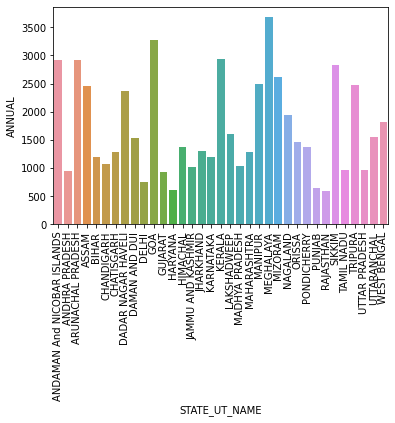

In [8]:
sns.barplot(x="STATE_UT_NAME",y="ANNUAL",data=moddf)
plt.xticks(rotation=90);
plt.show()

# Graph for annual rainfall

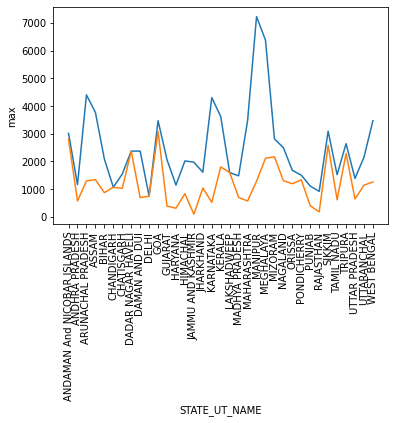

In [9]:
sns.lineplot(y="max",x="STATE_UT_NAME",data=df)
sns.lineplot(y="min",x="STATE_UT_NAME",data=df)
plt.xticks(rotation=90);
plt.show()

In [10]:
moddf=moddf[moddf.columns[1:14]]

In [12]:
DF2=moddf.mean()
DF2=pd.DataFrame(DF2)
DF2.reset_index(drop=False,inplace=True)
DF2.rename(columns={'index':"month", 0:'mean'}, inplace=True)


C:\Users\aadar\AppData\Local\Temp\ipykernel_5520\208022594.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  DF2=moddf.mean()


In [15]:
DF1=moddf.min()
DF1=pd.DataFrame(DF1)
DF1.reset_index(drop=False,inplace=True)
DF1.rename(columns={'index':"month", 0:'min'}, inplace=True)
DF1.drop(0,axis=0,inplace=True)


In [16]:
modf=moddf.max()
modf=pd.DataFrame(modf)
modf.reset_index(drop=False,inplace=True)
modf.rename(columns={'index':"month", 0:"max"}, inplace=True)
modf.drop(0,axis=0,inplace=True)
modf.drop(12,axis=0,inplace=True)


In [18]:
combined_df=DF2.copy()
combined_df['max']=modf['max']
combined_df['min']=DF1['min']
combined_df

,month,mean,max,min
0,JAN,21.856057,NaN,NaN
1,FEB,26.032857,81.925,0.4
2,MAR,39.448343,93.294,0.05
3,APR,64.622057,165.019,0.0
4,MAY,122.528429,275.162,0.0
5,JUN,275.111057,430.043,4.15
6,JUL,396.631086,908.1,46.325
7,AUG,332.253486,1108.1,72.606
8,SEP,223.827800,683.8,91.572
9,OCT,115.784000,454.7,78.255


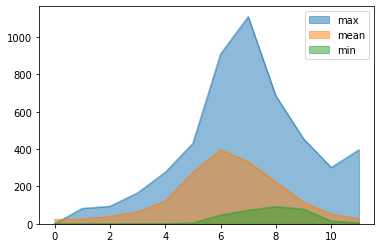

In [19]:
month_wise_df_new=combined_df[['max','mean','min']].plot.area(stacked=False)

In [20]:
heatmap_data=moddf.set_index("STATE_UT_NAME")


<AxesSubplot:ylabel='STATE_UT_NAME'>

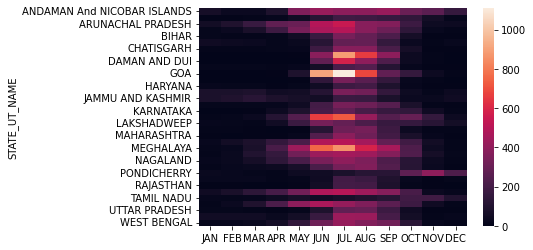

In [21]:
sns.heatmap(heatmap_data)